<a href="https://colab.research.google.com/github/thinh-nlu/house-prediction-boston/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project
Tải và đọc dữ liệu dataset





In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/projectML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/projectML


#1. Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

#2. Check_out dataset


In [3]:
house = pd.read_csv("/content/gdrive/MyDrive/projectML/Boston (1).csv")
house.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#2.2 info,discribe,**columns**

In [4]:
# code
house.info()

print("---------------------------")
house.columns

house.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
---------------------------


,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#3. Exploratory Data Analysis (EDA)

<ipython-input-5-9eefb5da465d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house['MEDV'], bins=20, kde=True)


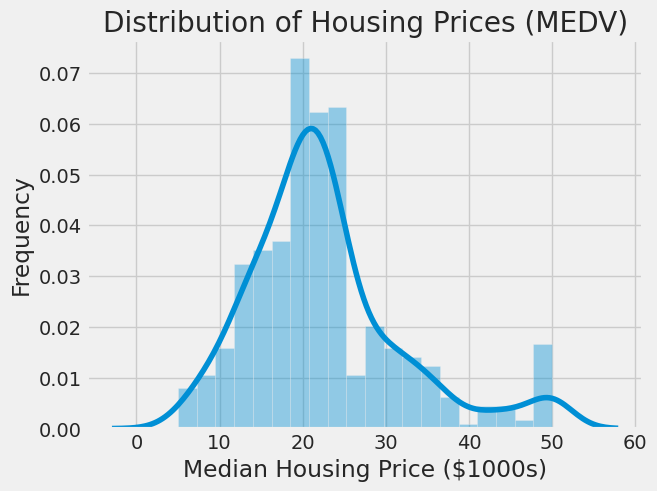

In [5]:
# code
sns.distplot(house['MEDV'], bins=20, kde=True)
plt.title('Distribution of Housing Prices (MEDV)')
plt.xlabel('Median Housing Price ($1000s)')
plt.ylabel('Frequency')
plt.show()

#4. Train Test Split


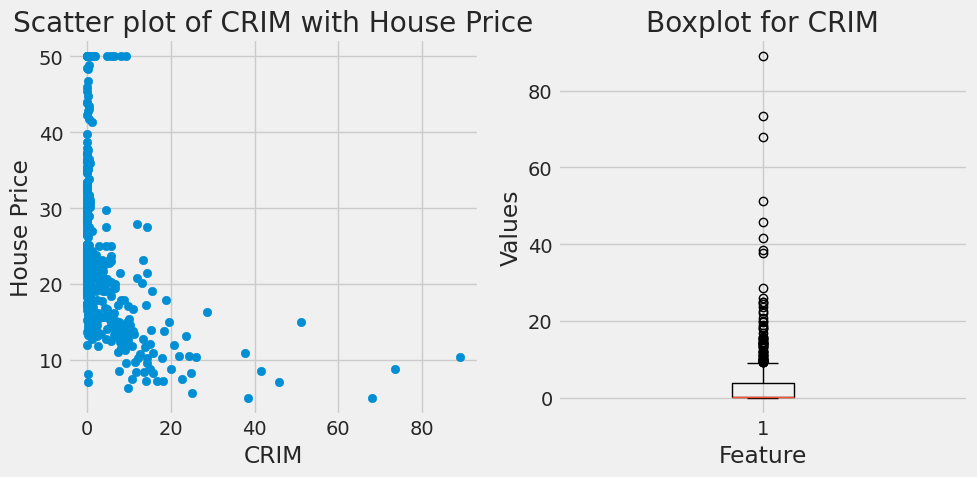

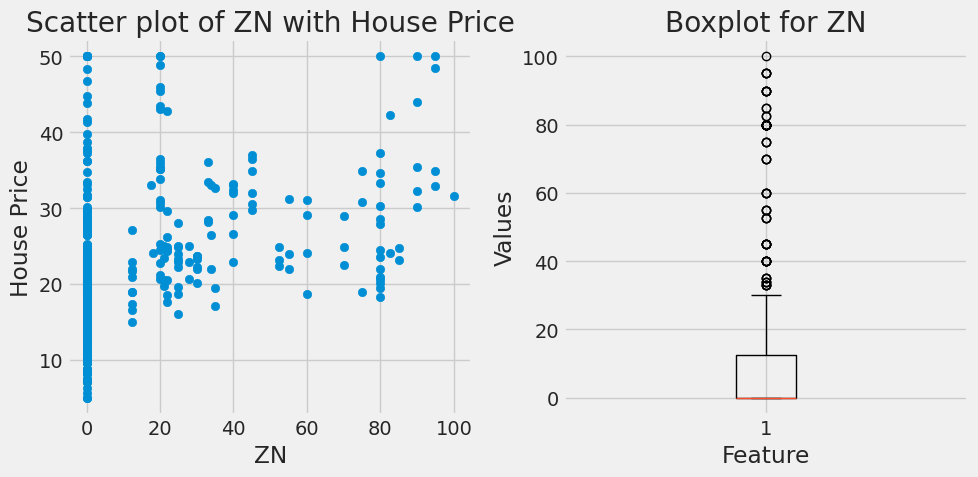

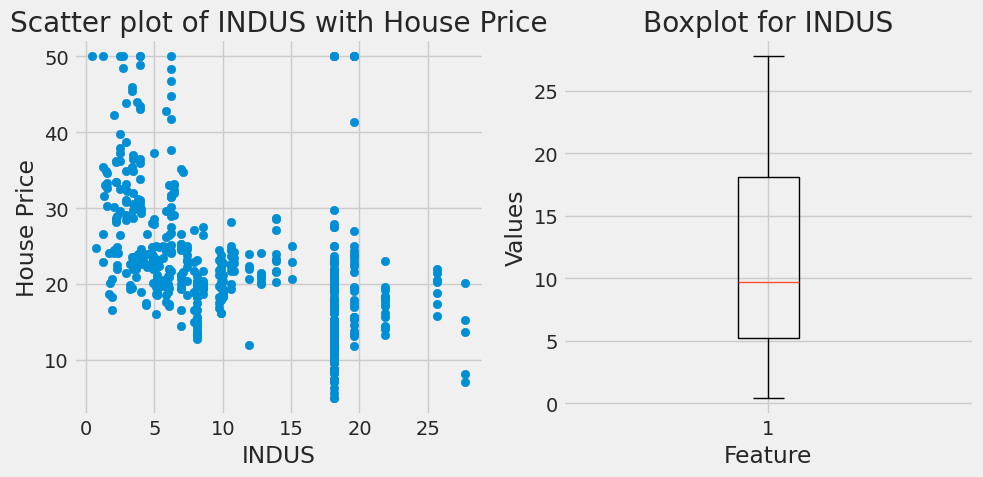

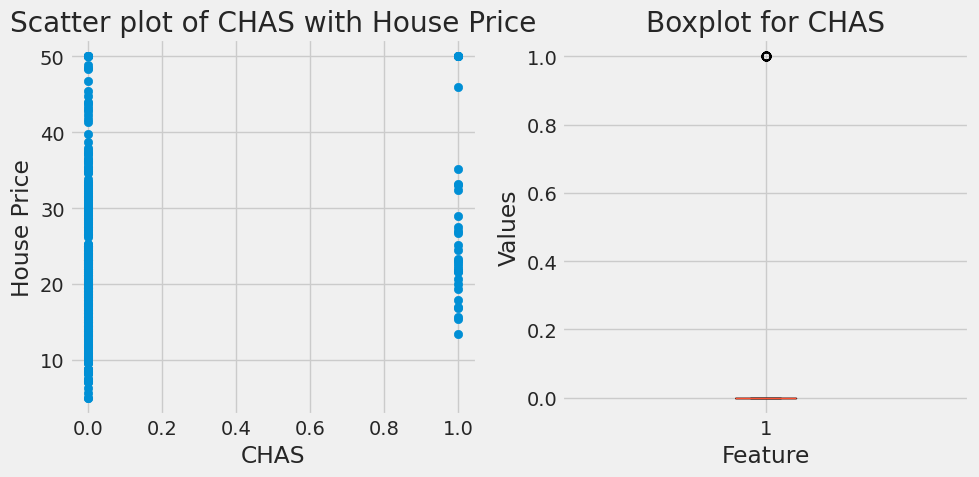

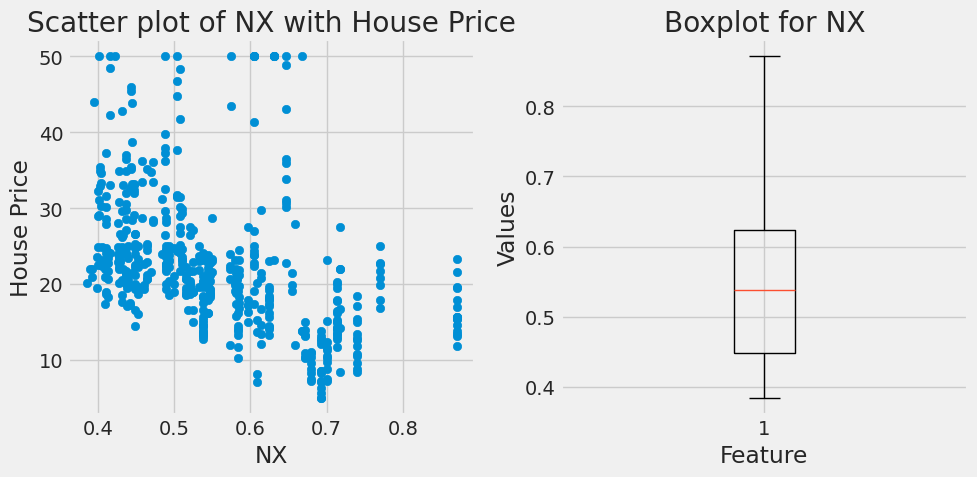

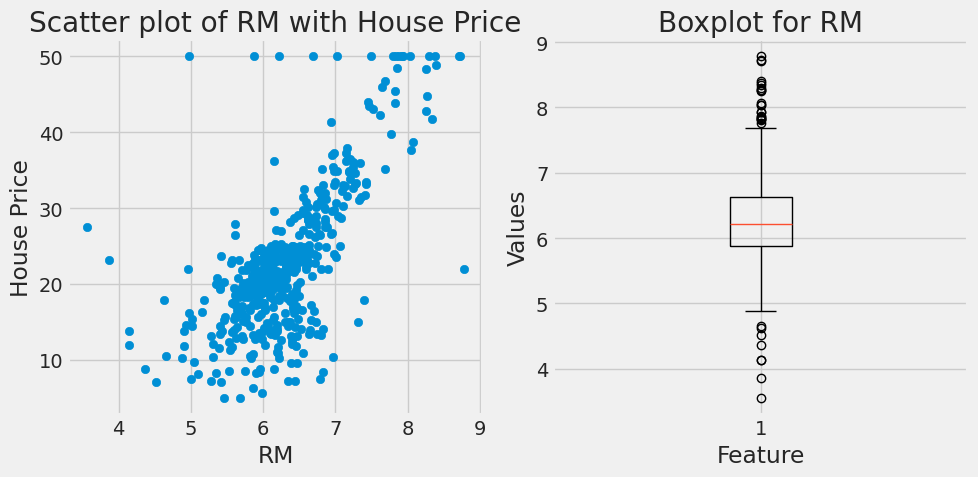

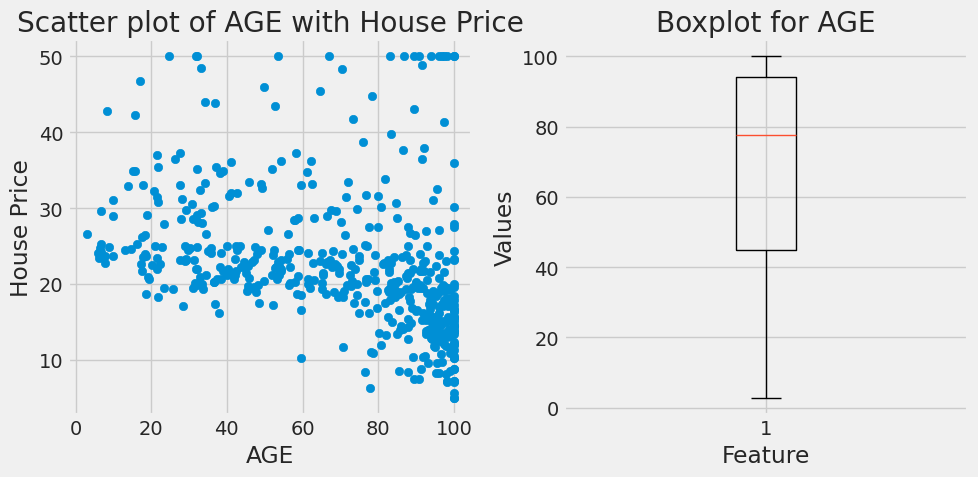

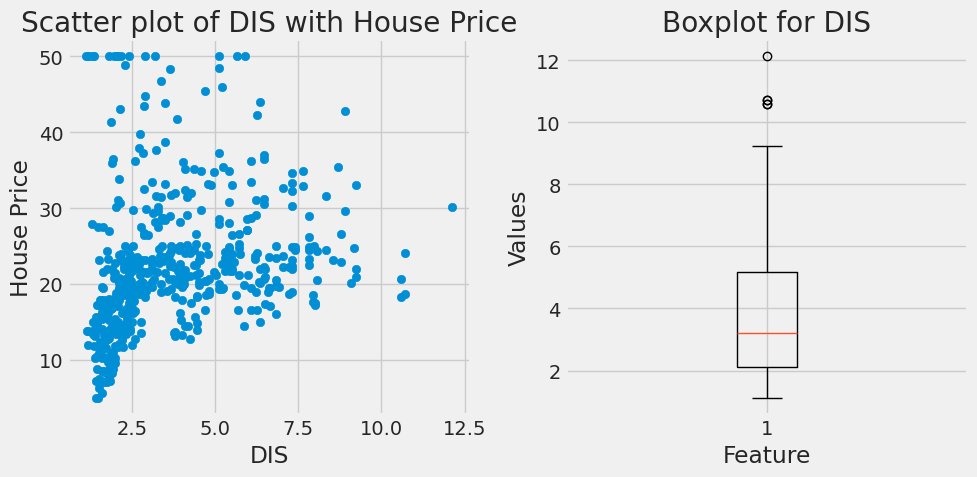

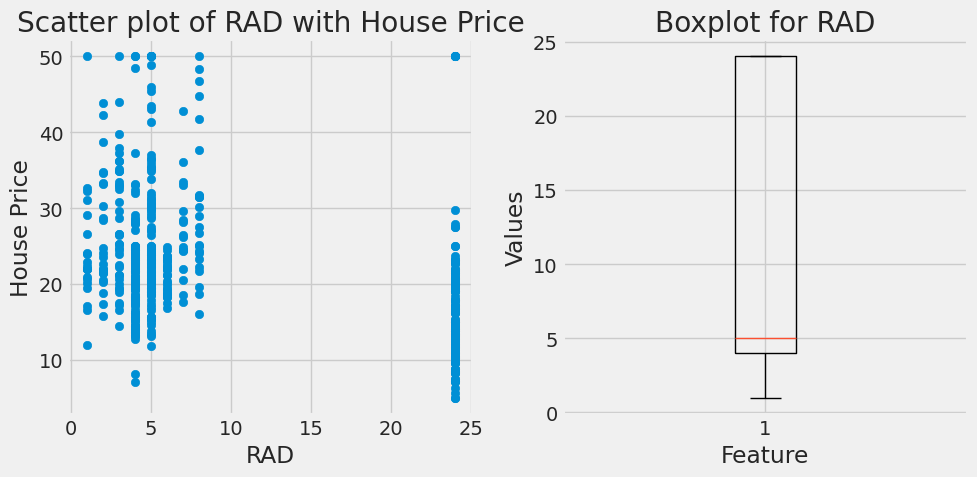

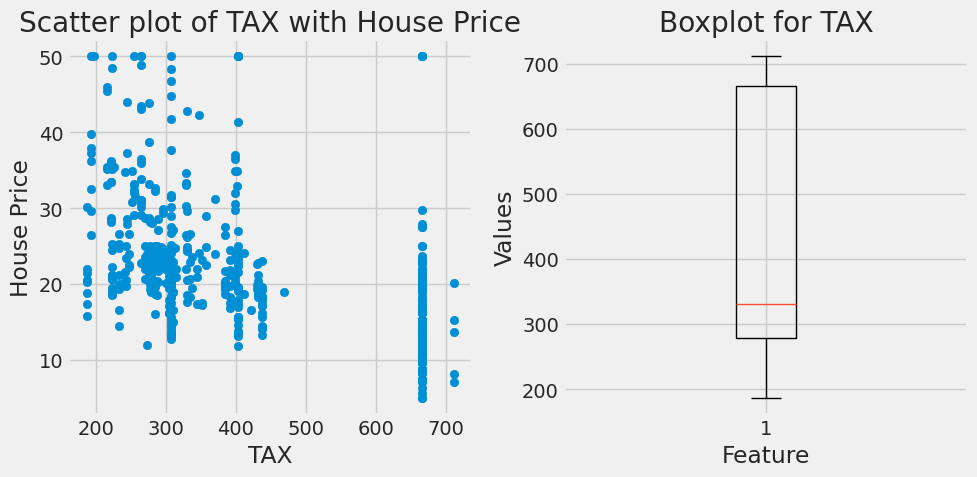

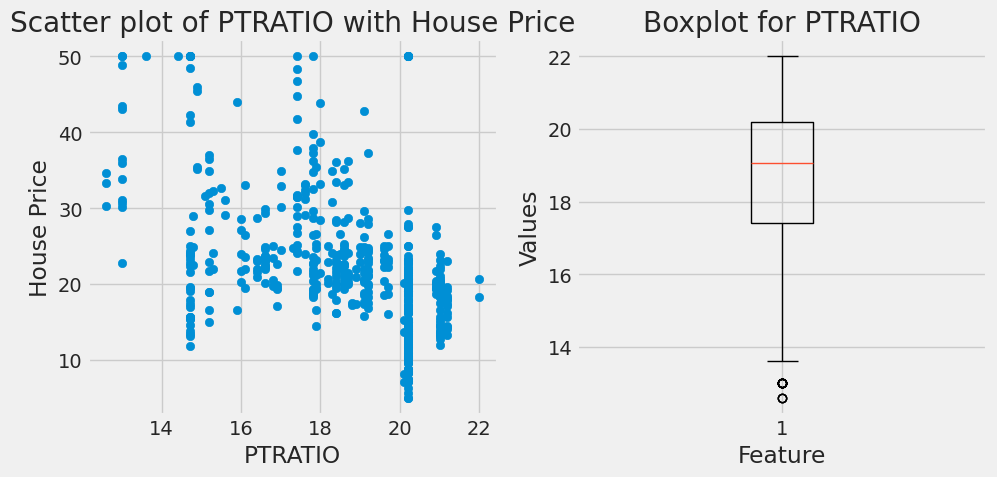

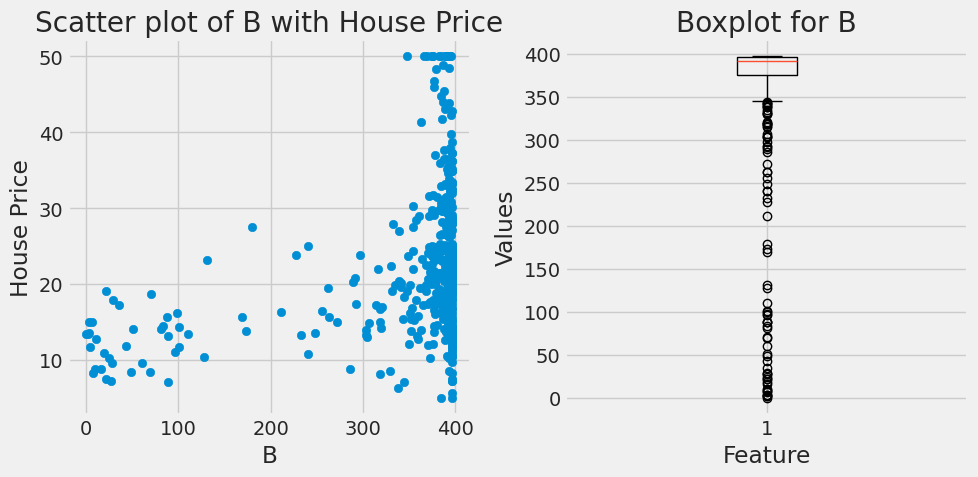

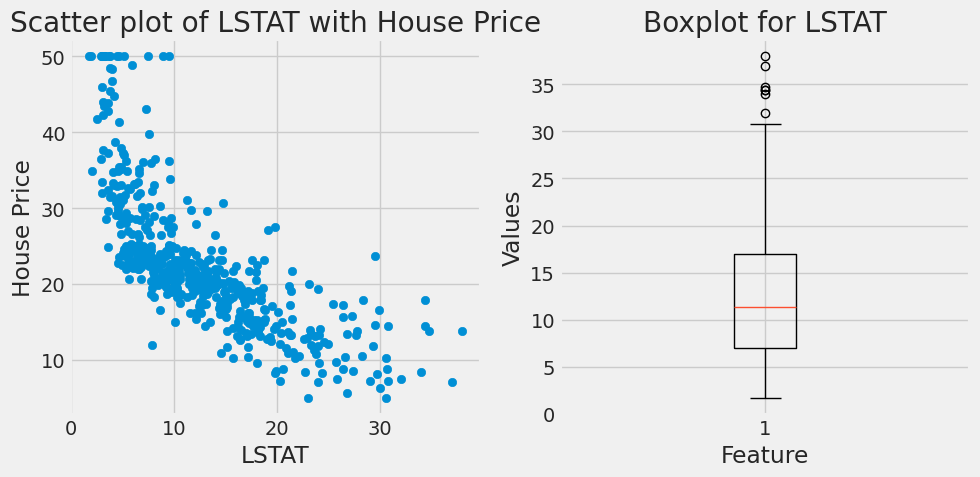

In [10]:
# List of features
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

# Create a scatter plot and boxplot for each feature side by side
for feature in features:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))  # Create a new figure with 1 row and 2 columns

    # Scatter plot of feature with target variable
    axes[0].scatter(house[feature], house['MEDV'])
    axes[0].set_title(f'Scatter plot of {feature} with House Price')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('House Price')

    # Boxplot of the feature
    axes[1].boxplot(house[feature])
    axes[1].set_title(f'Boxplot for {feature}')
    axes[1].set_xlabel('Feature')
    axes[1].set_ylabel('Values')

    plt.tight_layout()
    plt.show();


✔️ Linear Regression

Coefficients: [-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842]
Mean squared error: 24.291119474973485


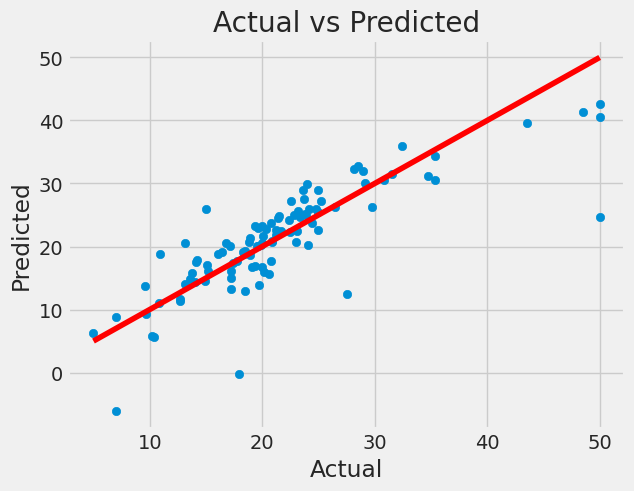

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def mape_score(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    mape = mape_score(true, predicted)
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('MAPE:', mape)
    print('R2 Square', r2_square)
    print('________________________________')

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    mape = mape_score(true, predicted)
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, mape, r2_square

  # print("--------------------new------------------------------------------------")
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])
# use piplines to scale data (Whenever our data is not normally distributed, we use it to get normal distribution. You must have tried using distplots and found tha the data is right or left skewed. So it helps dealing with that.)
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)


# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Khởi tạo và huấn luyện mô hình
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# In ra các hệ số của mô hình
print("Coefficients:", lin_reg.coef_)

# Dự đoán trên tập dữ liệu test
y_pred = lin_reg.predict(X_test_scaled)

# Tính và in ra sai số trung bình bình phương trên tập dữ liệu test
from sklearn.metrics import mean_squared_error
print("Mean squared error:", mean_squared_error(y_test, y_pred))



# Tính giá trị dự đoán tương ứng với các giá trị X_test_scaled
y_values = lin_reg.predict(X_test_scaled)

# Vẽ biểu đồ
plt.scatter(y_test, y_values)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Đường y = x
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


#5. ✔️ Artficial Neural Network


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.callbacks import Callback
epochs = 400
batch_size = 32
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
check_point_path = "model.h5"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(check_point_path, save_best_only=True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=10)
model = Sequential([
    tf.keras.layers.Input(X_train.shape[1]),
    Dense(16, activation="relu"),
    Dense(16, activation="relu"),
    Dense(16, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1)
])
optimizer = tf.keras.optimizers.Adam(0.0008)
model.compile(optimizer=optimizer, loss='mse', metrics=["mae", "mape"])

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=batch_size,
              epochs=epochs, callbacks=[model_checkpoint, early_stop])

Epoch 1/400
13/13 [==============================] - 2s 54ms/step - loss: 592.6737 - mae: 22.5104 - mape: 98.5560 - val_loss: 516.5615 - val_mae: 21.0896 - val_mape: 97.8941
Epoch 2/400
13/13 [==============================] - 0s 8ms/step - loss: 578.4128 - mae: 22.2052 - mape: 96.9980 - val_loss: 501.1433 - val_mae: 20.7528 - val_mape: 96.1257
Epoch 3/400
 1/13 [=>............................] - ETA: 0s - loss: 485.2311 - mae: 19.7862 - mape: 95.4509

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 0s 9ms/step - loss: 558.2044 - mae: 21.7735 - mape: 94.8500 - val_loss: 477.5761 - val_mae: 20.2306 - val_mape: 93.4040
Epoch 4/400
13/13 [==============================] - 0s 10ms/step - loss: 527.9609 - mae: 21.1104 - mape: 91.5560 - val_loss: 441.6355 - val_mae: 19.4201 - val_mape: 89.2779
Epoch 5/400
13/13 [==============================] - 0s 10ms/step - loss: 481.3821 - mae: 20.0574 - mape: 86.4570 - val_loss: 389.1980 - val_mae: 18.1605 - val_mape: 82.8822
Epoch 6/400
13/13 [==============================] - 0s 10ms/step - loss: 418.1284 - mae: 18.4632 - mape: 78.5567 - val_loss: 314.3433 - val_mae: 16.2416 - val_mape: 73.9800
Epoch 7/400
13/13 [==============================] - 0s 10ms/step - loss: 329.7732 - mae: 16.0760 - mape: 67.7642 - val_loss: 225.1880 - val_mae: 13.5330 - val_mape: 61.9656
Epoch 8/400
13/13 [==============================] - 0s 9ms/step - loss: 233.1414 - mae: 12.8264 - mape: 54.1031 - val_loss: 132.7689 - val_mae

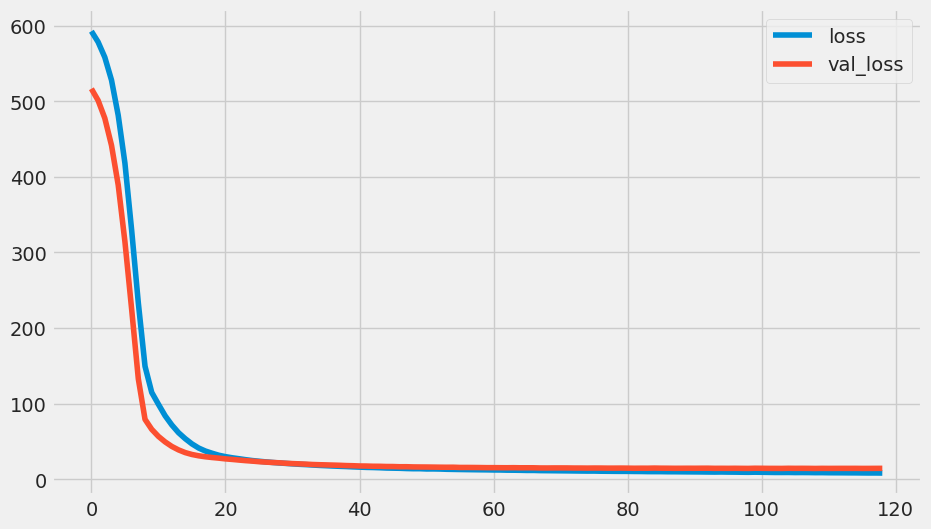

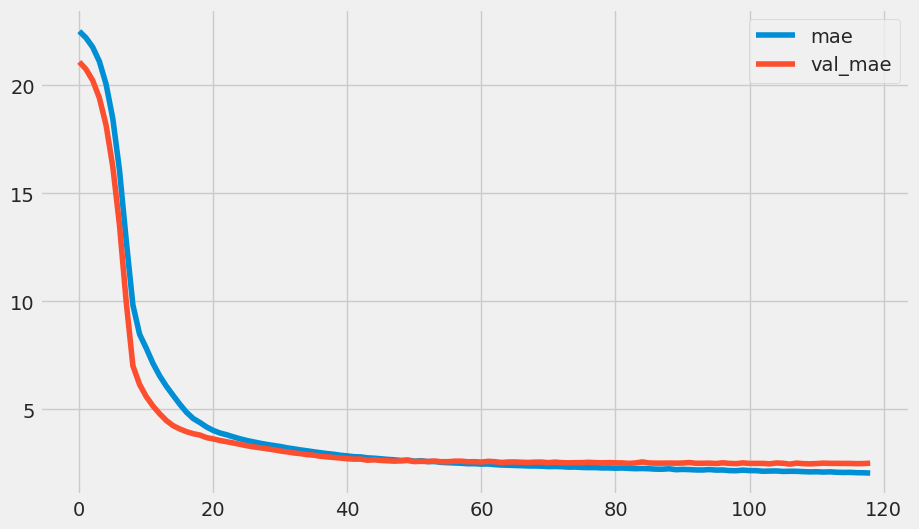

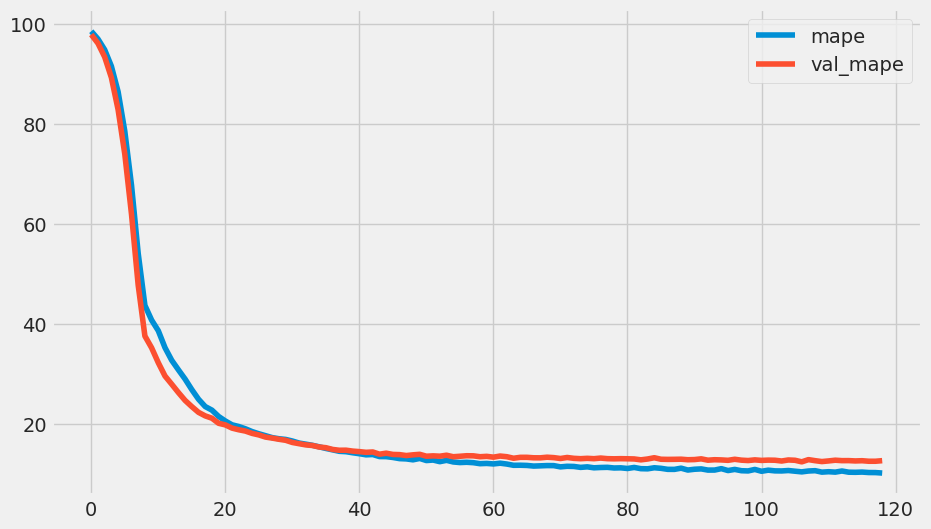

In [20]:
for metric in ["loss", "mae", "mape"]:
    plt.figure(figsize=(10, 6))
    plt.plot(r.history[metric], label=metric)
    plt.plot(r.history['val_'+metric], label='val_' + metric)
    plt.legend()

In [21]:
model.load_weights(check_point_path)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

# print('Test set evaluation:\n_____________________________________')
# print_evaluate(y_test, test_pred)

# print('Train set evaluation:\n_____________________________________')
# print_evaluate(y_train, train_pred)

13/13 [==============================] - 0s 2ms/step


In [14]:
import pandas as pd

# Giả sử evaluate trả về một danh sách hoặc mảng 1 chiều
def evaluate(y_true, y_pred):
    # Tính toán các chỉ số đánh giá (ví dụ)
    mae = np.mean(np.abs(y_true - y_pred))
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2_square = 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
    return [mae, mse, rmse, mape, r2_square]

results_df = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2 Square', 'Cross Validation'])

# Dữ liệu mẫu
y_test = np.random.rand(102)
test_pred = np.random.rand(102)
y_pred = np.random.rand(102)

# Thêm kết quả của Artificial Neural Network
results_df_2 = pd.DataFrame(data=[["Artificial Neural Network", *evaluate(y_test, test_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

# Thêm kết quả của Linear Regression
results_df_1 = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, y_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_1], ignore_index=True)

# Hiển thị kết quả
print(results_df)


                       Model       MAE       MSE      RMSE        MAPE  \
0  Artificial Neural Network  0.347238  0.180075  0.424352  185.193992   
1          Linear Regression  0.322645  0.160226  0.400282  169.929495   

   R2 Square Cross Validation  
0  -1.161123                0  
1  -0.922912                0  


6.✔️  Split the Data

In [15]:
# Split the Data
X = house.drop(columns=['MEDV']) #features
y = house['MEDV'] #target variable

# Splitting Data for Train and Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=2)

# shape of spiltted data
print("The shape of X_train :",X_train.shape)
print("The shape ofX_test :",X_test.shape)
print("The shape of y_train :",y_train.shape)
print("The shape of y_test :",y_test.shape)

The shape of X_train : (404, 13)
The shape ofX_test : (102, 13)
The shape of y_train : (404,)
The shape of y_test : (102,)


#7. ✔️ Random Forest Regressor


In [16]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth = 10, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200)

In [17]:
# Fit the model on Training datset
rfr.fit(X_train,y_train)
# Predictions of  Ranforest Forest Regressor on Testing Data
y_pred_rfr = rfr.predict(X_test)
# Accuracy Score of Model

# Accuracy Score of Model
from sklearn.metrics import mean_absolute_percentage_error
error = mean_absolute_percentage_error(y_pred_rfr,y_test)
print("Accuracy of Random Forest Regressor is :%.2f "%((1 - error)*100),'%')

Accuracy of Random Forest Regressor is :90.25  %


#Finally,
Remember renaming the notebook.